<a href="https://colab.research.google.com/github/ajitkumarpatel1/MOBILE_PRICE_RANGE_PREDICTION-/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b><u>**Problem Statement**

##<b>In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

##<b><u>Data Description -


* Battery_power - Total energy a battery can store in one time measured in mAh
* Blue - Has bluetooth or not
* Clock_speed - speed at which microprocessor executes instructions
* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are
* Three_g - Has 3G or not
* Touch_screen - Has touch screen or not
* Wifi - Has wifi or not
* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

##<u><b>IMPORTING LIBRABARY & DATASET

In [ ]:
#Importing Librabary for python data manipulation
import pandas as pd
import numpy as np

#Import librabary for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing librabary for data type Transfermation
from datetime import datetime
import datetime as dt

# Importing Librabary for data Encoding
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

#Importing Librabary for machinelearing Regression Implementain
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Importing Librabry for Make Ml model simple and acurate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from vecstack import stacking

#Importing Librabary for evaluation of model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 'Statsmodels' is used to explore data, estimate statistical models, and perform statistical tests
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Avoding the worning
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ALMABATTER/Mobile Price Range Prediction - Ajit Kumar Patel/data_mobile_price_range.csv")

<b>Making A DEEP COPY:

In [ ]:
# making a deep copy of our orginal data set
df = data.copy()

##<u><b>DATA INSPECTION:

<b>lets! see how our data set look like:

In [ ]:
# checking the 1st 25 lines of our data set for batter understanding.
df.head(25)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


<b>last 5 enteries of our data.

In [ ]:
# checking the lower part of our data set to gaing some information
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


<b>Data set shape

In [ ]:
# printing the shape of data shape
print('the no of row present in the data frame = ',df.shape[0])
print('the no of column present in the data frame = ',df.shape[1])
print("*"*50)
print('the no of data present in the data frame = ',df.size)

the no of row present in the data frame =  2000
the no of column present in the data frame =  21
**************************************************
the no of data present in the data frame =  42000


In [ ]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

###<b>Column information & Data Types

Now lets take a high-level look over the data using the .info() method:

In [ ]:
# Gathering hte information of our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# unique values
df.apply(lambda x: len(x.unique()))

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

###<b>All Data Description

In [ ]:
# transposing the description of our all numerical data for better understanding
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


##<u><b>HANDLING MISSING VALUE:

<b> Null Value Inception

In [ ]:
null = df.isna().sum().sort_values(ascending = False)
null

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64

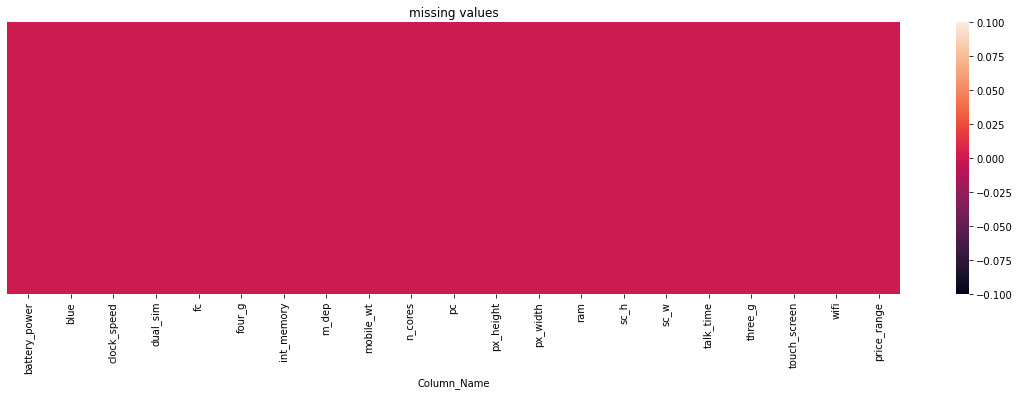

In [ ]:
# ploting a heat map to know the null value
plt.figure(figsize=(20, 5))
sns.heatmap(df.isnull(), yticklabels=False)
plt.xlabel("Column_Name")
plt.title("missing values")
plt.show()

In [ ]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


<b>OVERVIEW</b>

<b>Dataset statistics

* Number of rows:2000
* Number of columns:21
* Missing values:0
* Missing values (%):0%
* Checking Duplicate values: 0



---



---



---



In [ ]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 0 categorical variables
There are 21 numerical variables


In [ ]:
#How many uinque items are present in our data set in each columns:
for i in df:
  a = df[i].nunique()   
  if df[i].nunique() >=20:
    print(i, 'has' , a ,'unique value')
    print("*"*50)

  else :
    print(i, 'has' ,a, 'unique values and those are\n',df[i].value_counts())
    print("*"*50)

battery_power has 1094 unique value
**************************************************
blue has 2 unique values and those are
 0    1010
1     990
Name: blue, dtype: int64
**************************************************
clock_speed has 26 unique value
**************************************************
dual_sim has 2 unique values and those are
 1    1019
0     981
Name: dual_sim, dtype: int64
**************************************************
fc has 20 unique value
**************************************************
four_g has 2 unique values and those are
 1    1043
0     957
Name: four_g, dtype: int64
**************************************************
int_memory has 63 unique value
**************************************************
m_dep has 10 unique values and those are
 0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64
**************************************************
mobile_wt has 121 unique 

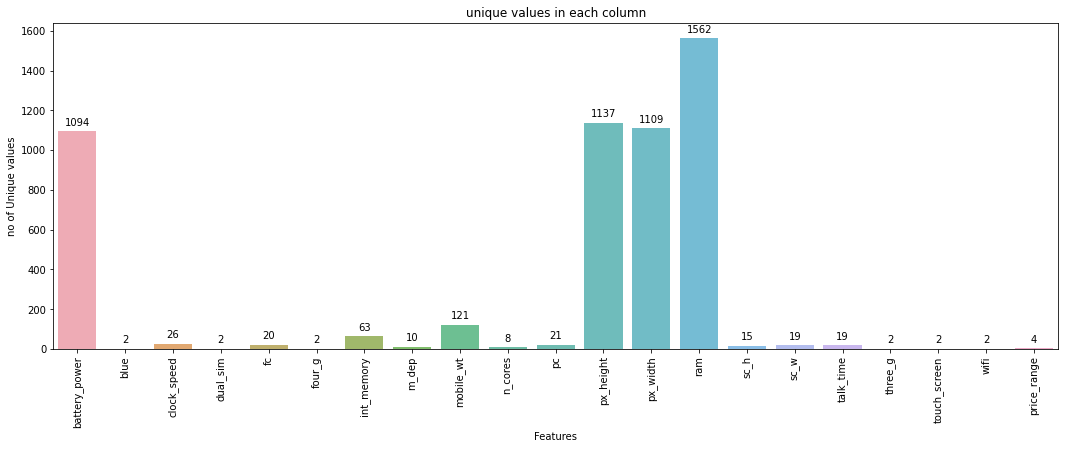

In [ ]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique


plt.figure(figsize=(18,6))
splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('unique values in each column')
plt.ylabel('no of Unique values')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

In [ ]:
continuous = [var for var in numerical if var not in ['price_range']]
print(list(continuous))

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


##<b>visualizing catagorical variable:

In [ ]:
##Classifying the data into categorical and numerical data
categorical_data = []
numerical_data = []
for col in df.columns:
    unique_values = len(df[col].unique())
    if unique_values < 30:
        categorical_data.append(col)
    else:
        numerical_data.append(col)

In [ ]:
for x in categorical_data:
        ("{} : {} values".format(x, df[x].unique()))
# print('**'*50)
for x in numerical_data:
        ("{} : {} values".format(x, df[x].unique()))

##<b><u>Univariant Analysis:

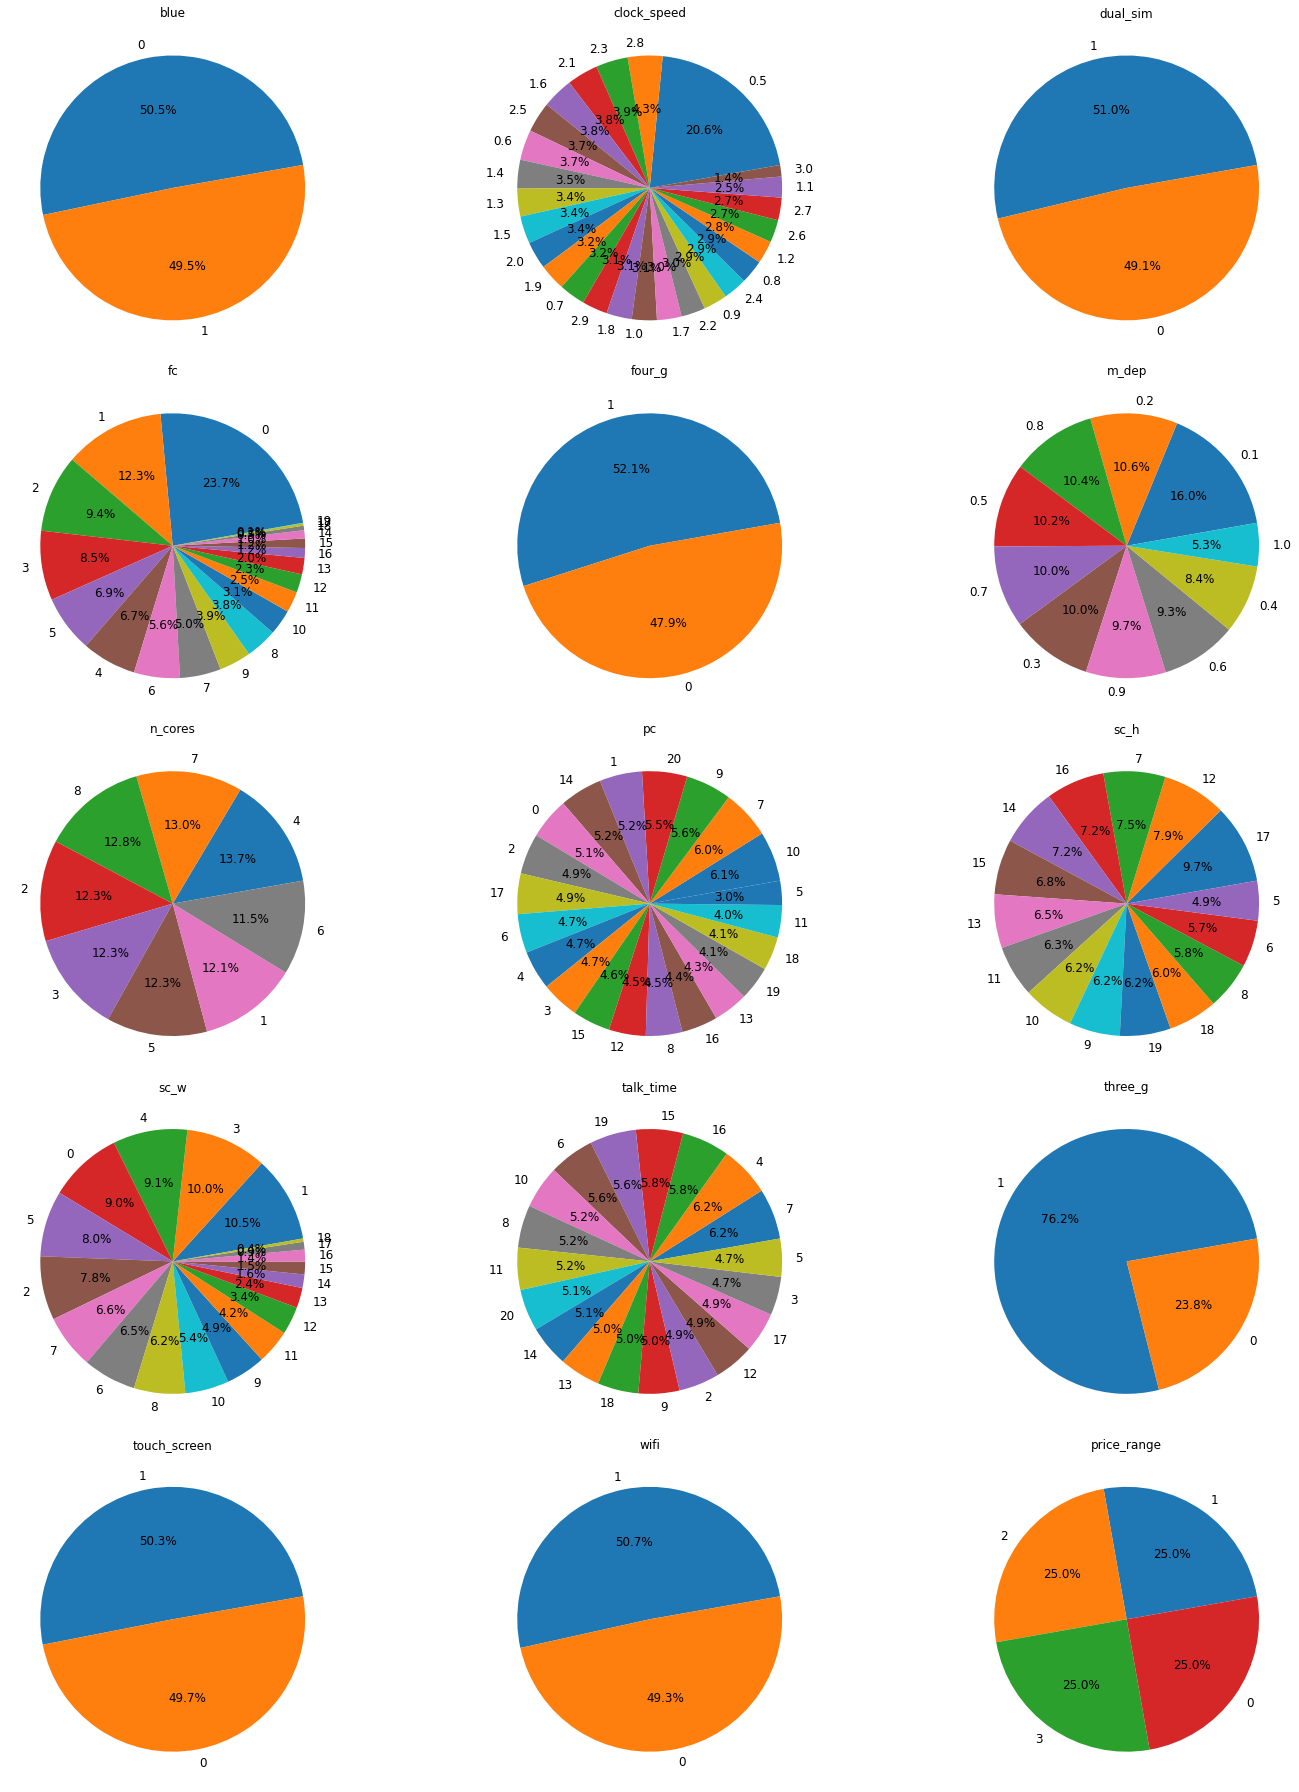

In [ ]:
#making pie chart for all catagorical type varibale
fig, axes = plt.subplots(5, 3, figsize=(24, 25))
axes = [ax for categorical_data in axes for ax in categorical_data]

for i, c in enumerate(df[categorical_data]):
  df[c].value_counts().plot(kind = 'pie', ax=axes[i], title=c, autopct='%1.1f%%', fontsize=12,startangle=10)
  axes[i].set_ylabel('')    
  plt.tight_layout()

###<b>conclusion:
1. 50.5%-not bluetooth and 49.5%-bluetooth mobiles data present
2. 51% - Dual sim & 49.1% no-dual sim mobiles are present
3.52.1%- 4g & 47.9% not4g are present
4.maximum 4 core processsor are present as compair to other but the 2,3,5 are same in counts,and the 6core processor are less in count.[ (4core-274/13.7%) ,(7cores-259/13.0%),
(8cores-256/12.8%),
(2cores-247/12.3%),
(3cores-246/12.3%),
(5cores-246/12.3%),
(1cores-242/12.1%),
(6cores-230/11.5%)
5.3g phone are 78.2% and the non3g are 23.8%
6.there are 50.3% of touch screen phone are hear and the rest are non touch screen
7.50.7% of wifi phone are present and rest are wifi less phone
8.price is equaly prsent as (low,high,medium,expensive)

##<b><u>Bivariate Analysis:

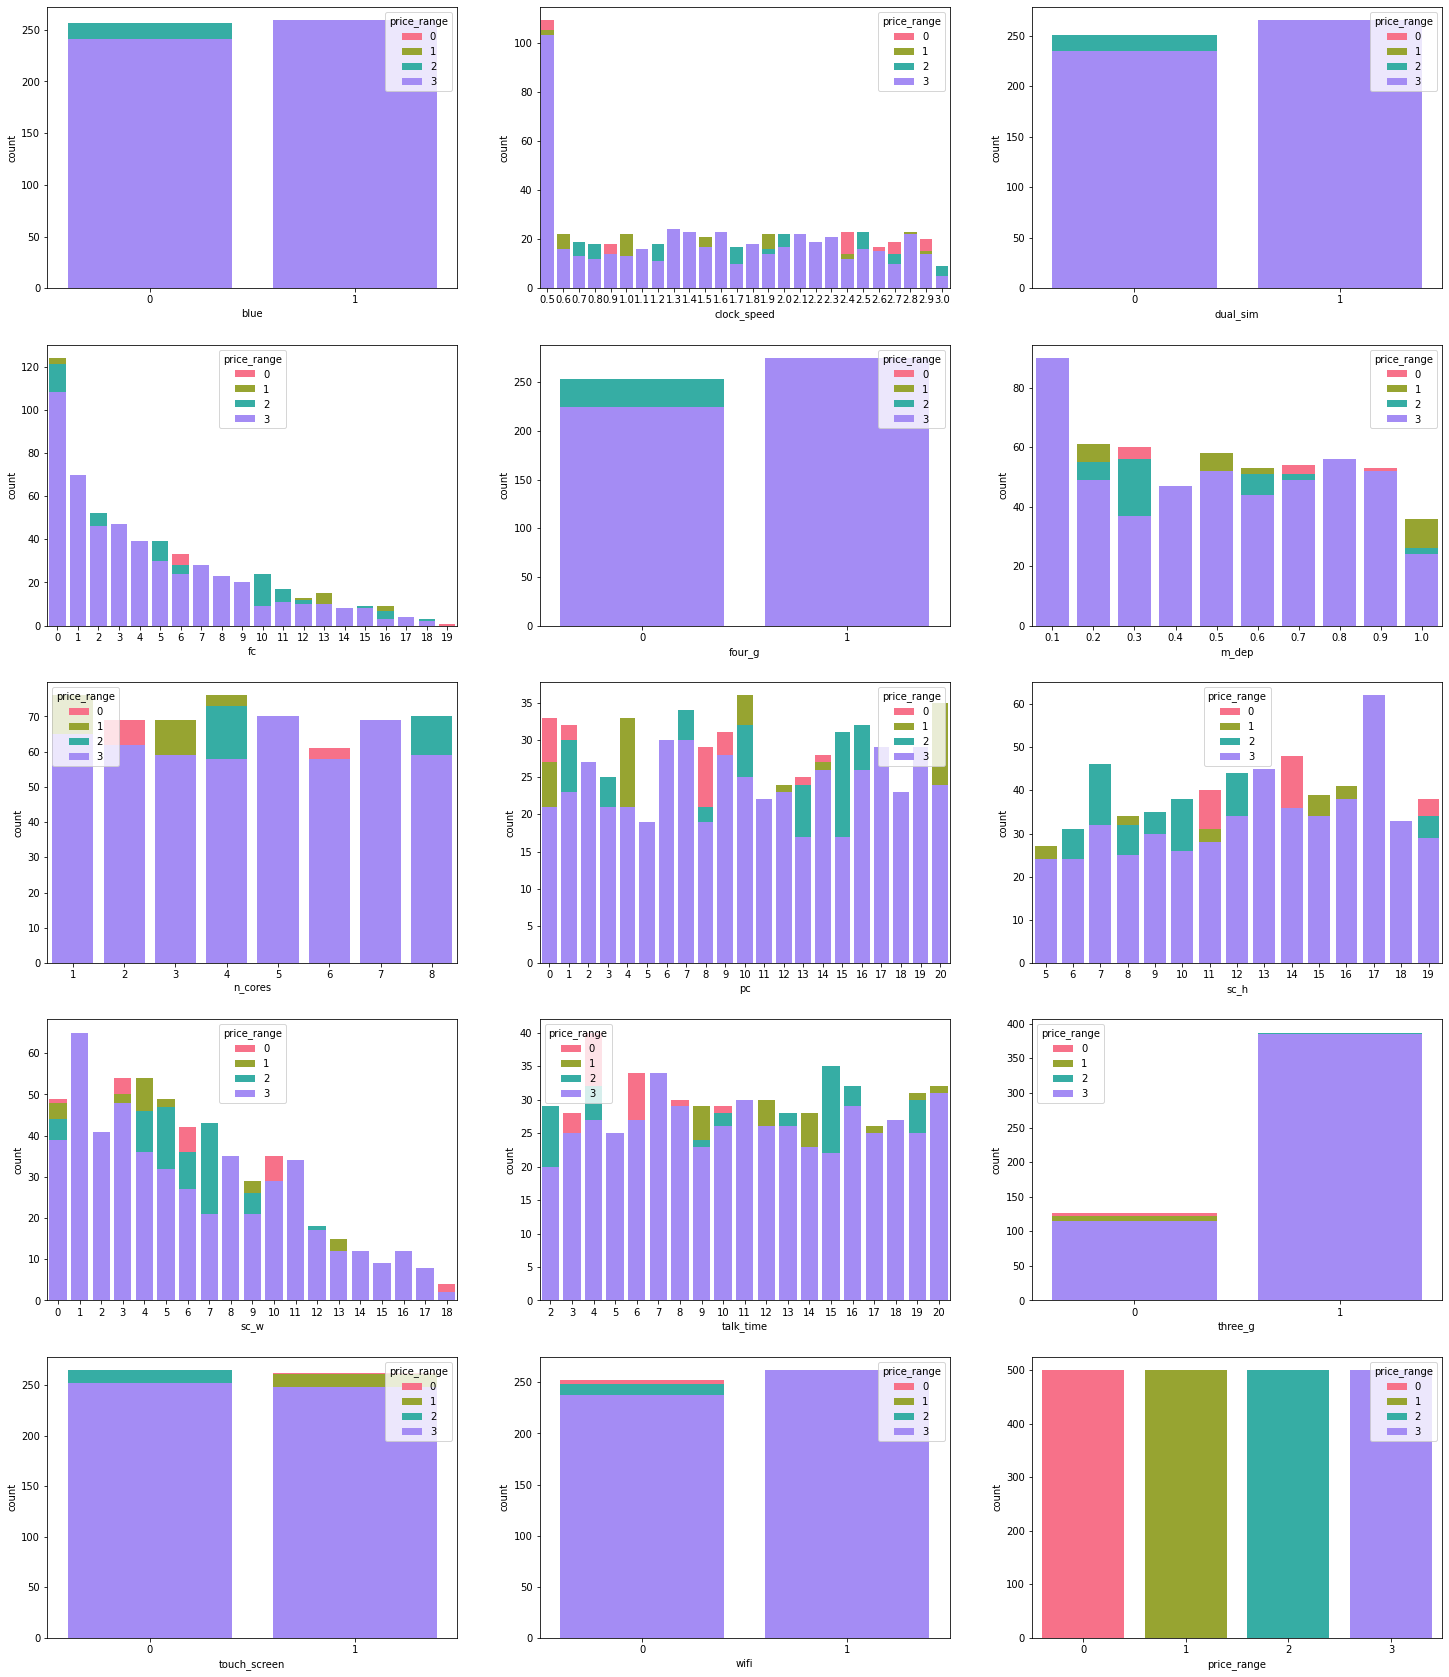

In [ ]:
#making a count plot for the catagorical type varible relation with dependent varible "price range"
count = 1
plt.figure(figsize = (25,30))
for cat in categorical_data:
  plt.subplot(5,3,count)
  sns.countplot(x = cat, data = df,hue='price_range', palette = 'husl',dodge=False,saturation=1)
  count+=1

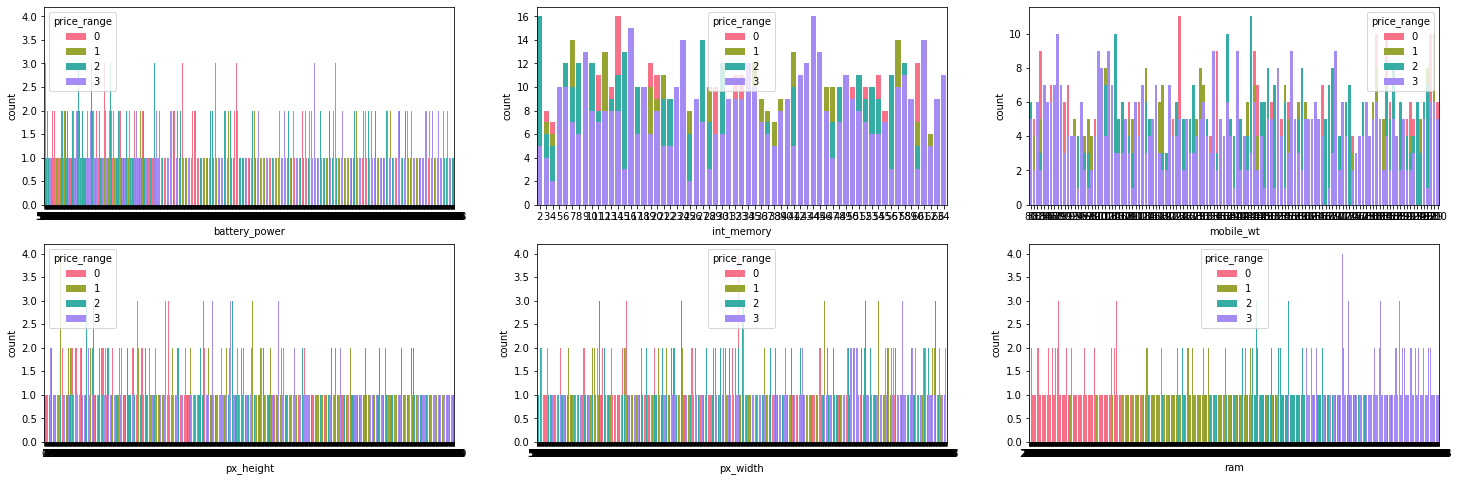

In [ ]:
count = 1
plt.figure(figsize = (25,8))
for cat in numerical_data:
    plt.subplot(2,3,count)
    sns.countplot(x = cat, data = df, palette = 'husl', hue = df['price_range'],dodge=False,saturation=1)
    count+=1  

##<b><u>Multivariate Analysis:

In [ ]:
# sns.pairplot(df, size=3)

##<b><u>CHECKING OUTLIERS & SKEWNESS:

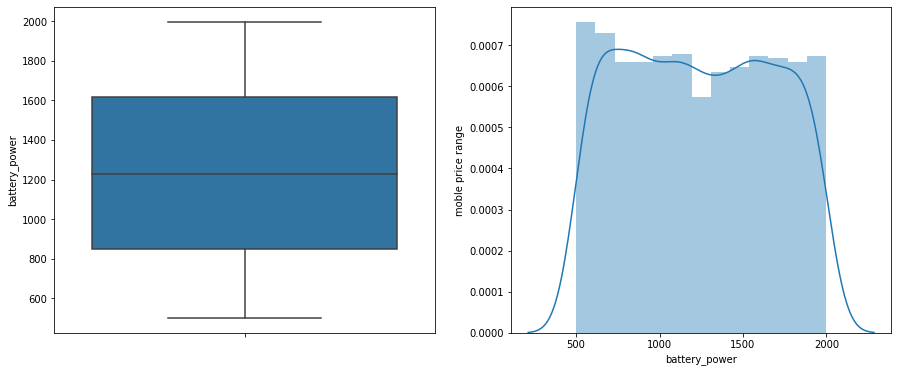

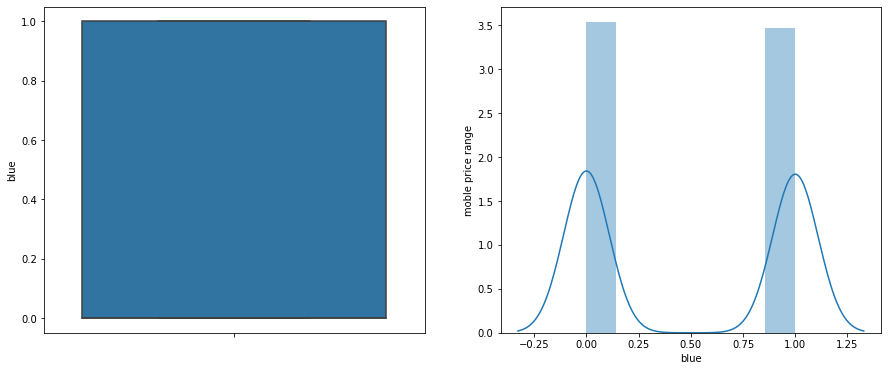

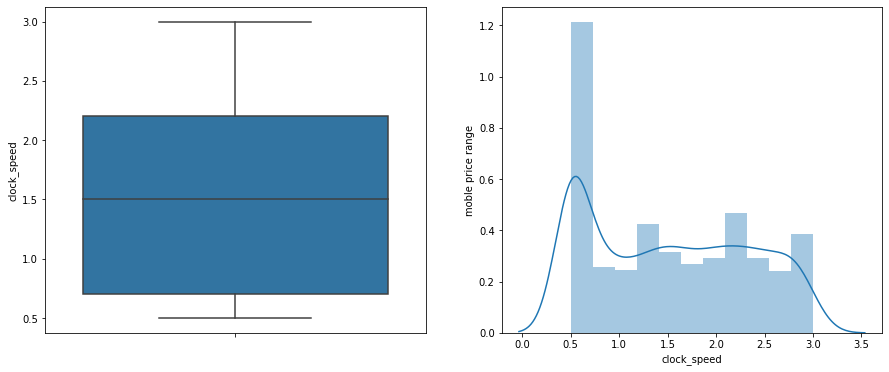

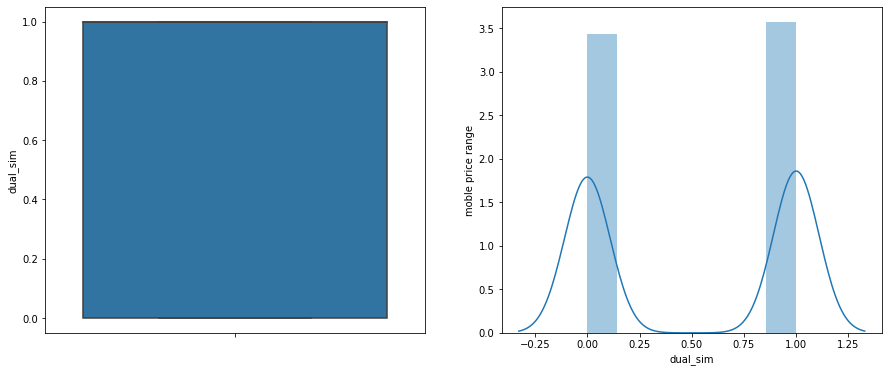

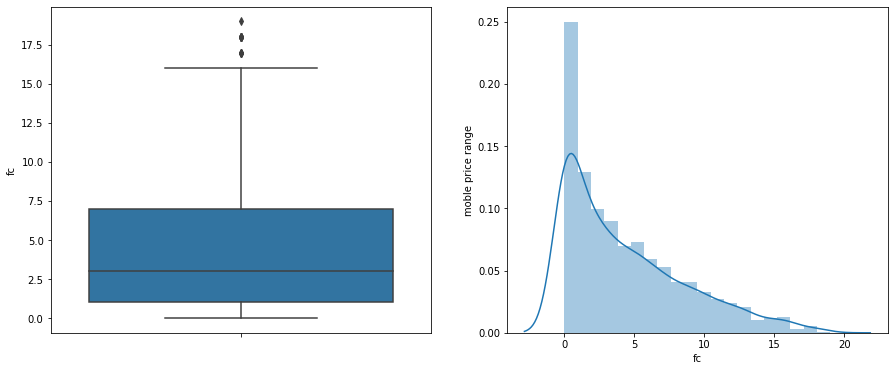

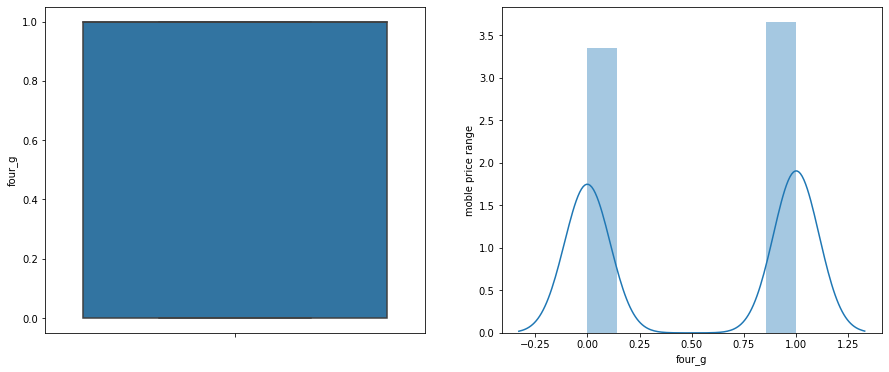

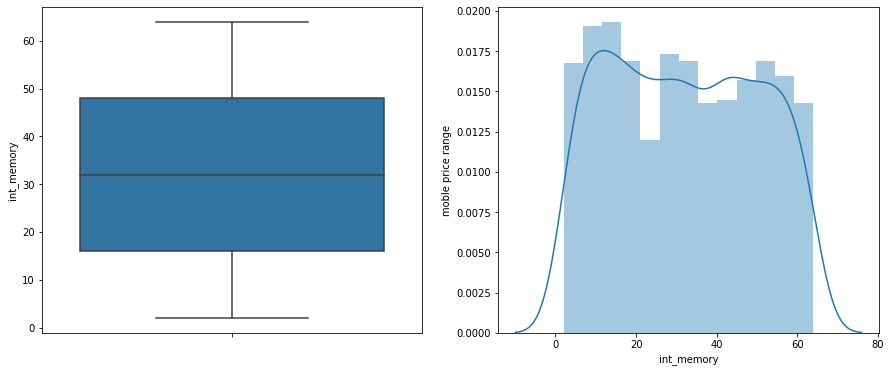

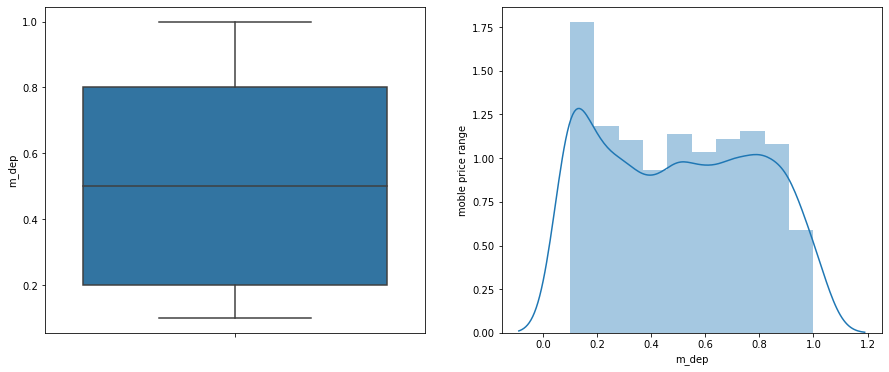

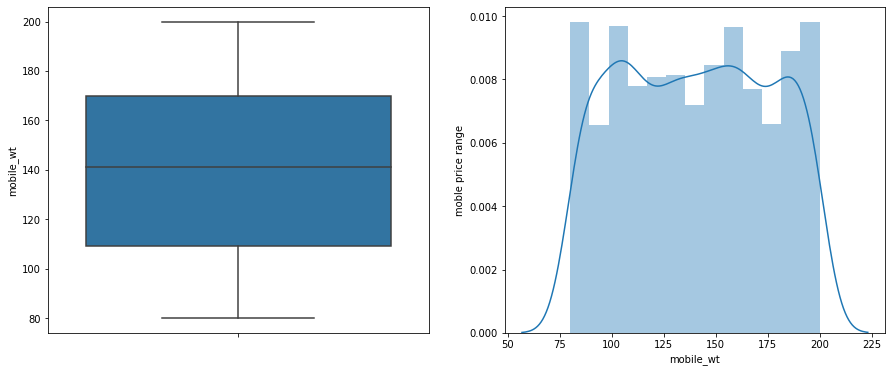

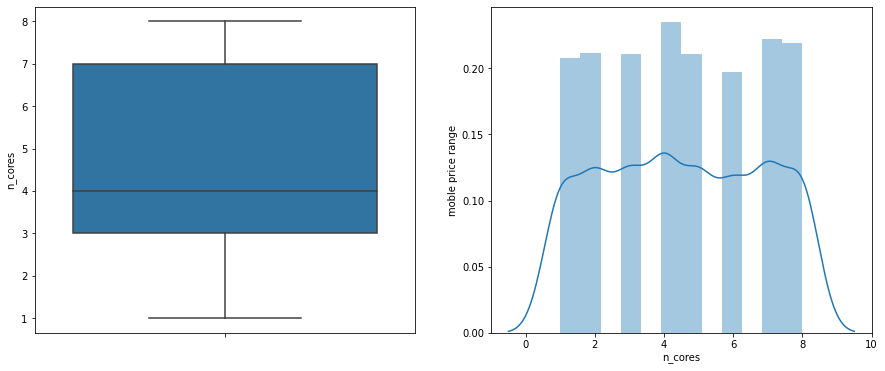

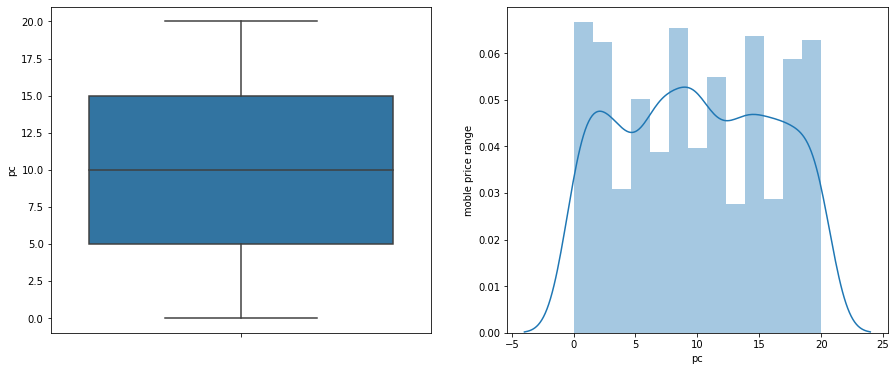

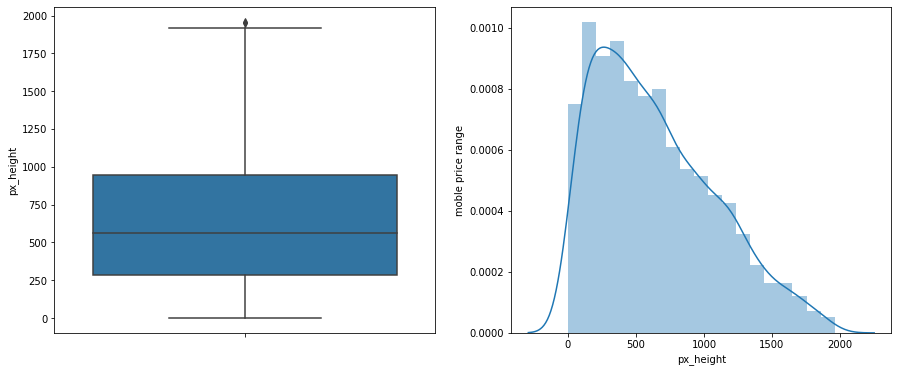

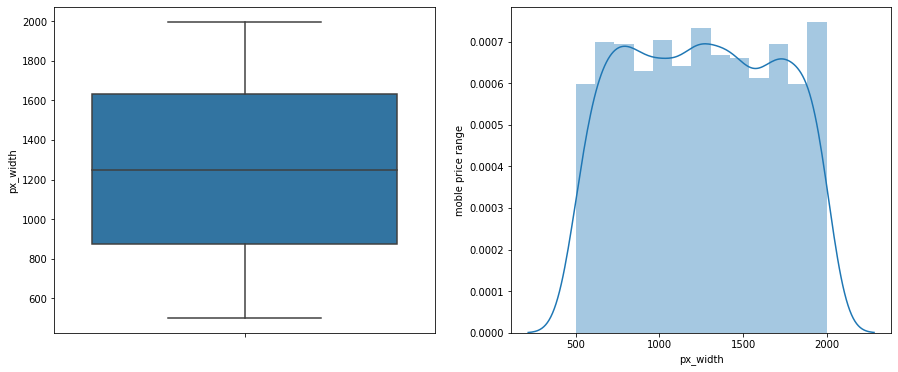

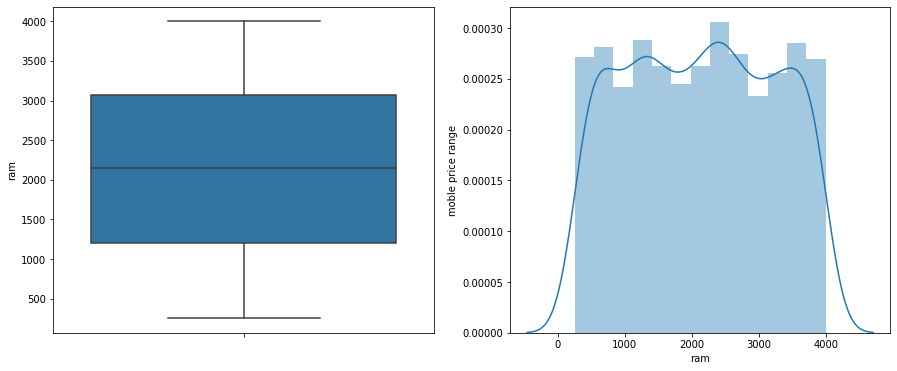

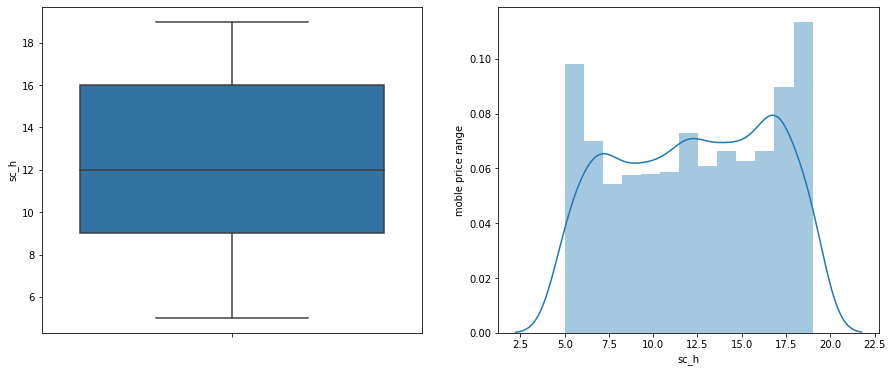

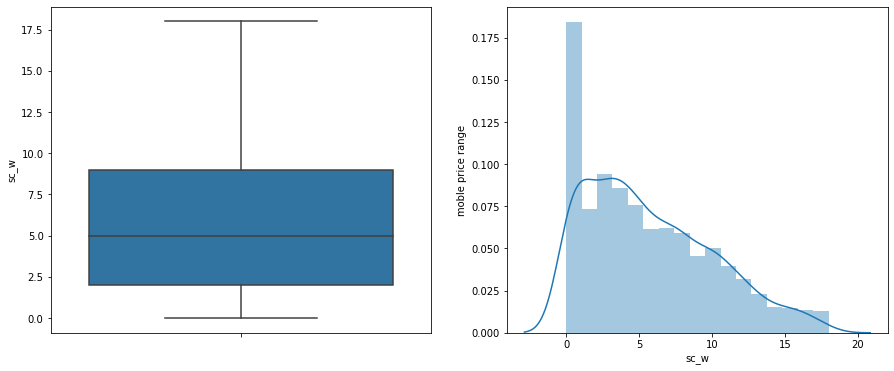

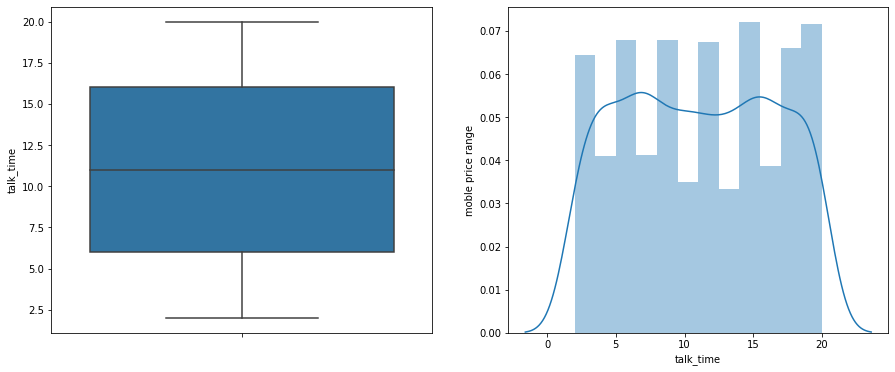

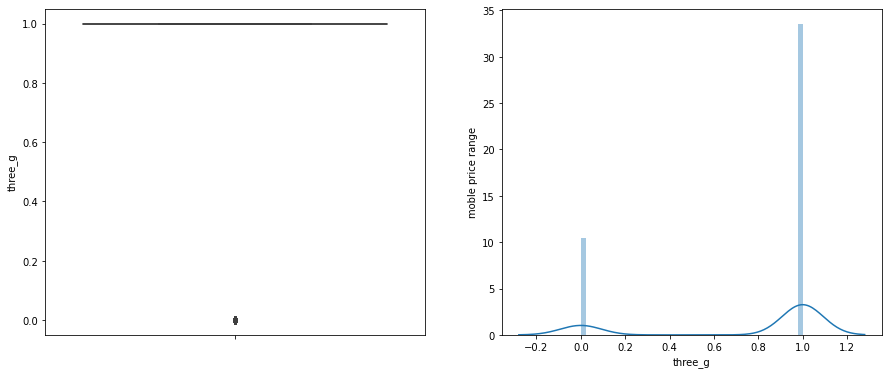

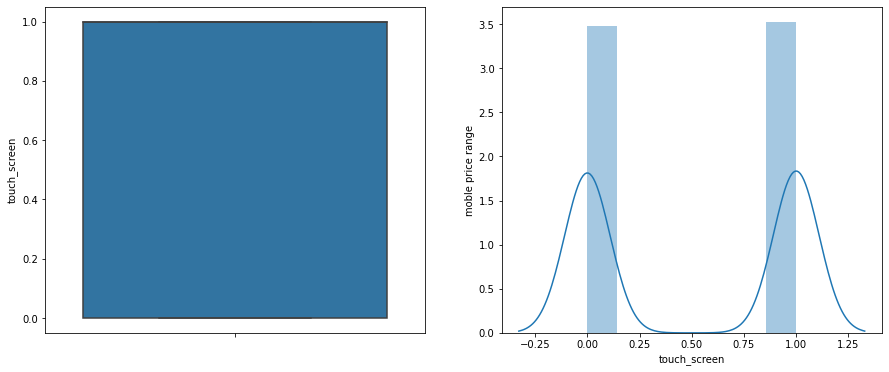

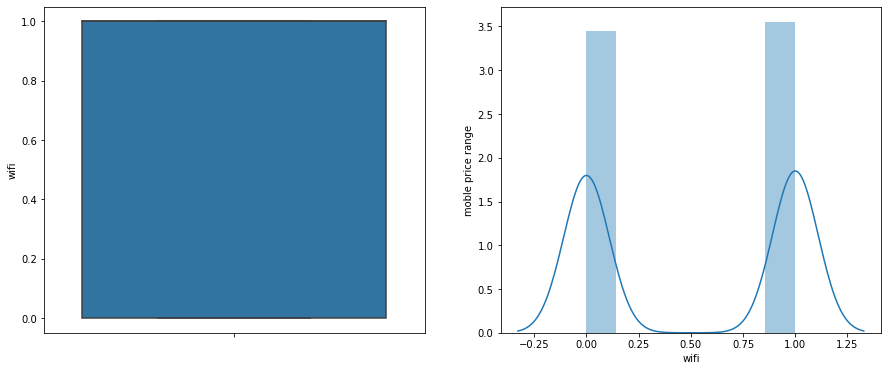

In [ ]:
## ploting boxplot to visualize outlier and subplot to visualize distribution
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var])
    fig.set_ylabel('moble price range')
    fig.set_xlabel(var)

    plt.show()

<b>Outliers can be visualised as the dots outside the whiskers in the boxplots. The majority of the continuous variables not seem to contain outliers. In addition, the majority of the variables are normally distributed. If we are planning to build classification model, we should tackle these minore ploblem to improve the model performance

In [ ]:
TABLE = {'SKEWNESS': df.skew(), 'KURTUSIS': df.kurt()}
TABLE_CHECK = pd.DataFrame(TABLE)
TABLE_CHECK

,SKEWNESS,KURTUSIS
battery_power,0.031898,-1.224144
blue,0.020016,-2.001602
clock_speed,0.178084,-1.323417
dual_sim,-0.038035,-2.000555
fc,1.019811,0.277076
four_g,-0.086144,-1.994575
int_memory,0.057889,-1.216074
m_dep,0.089082,-1.274349
mobile_wt,0.006558,-1.210376
n_cores,0.003628,-1.229750


In [ ]:
high_skew = ['fc','px_height','sc_w','three_g']

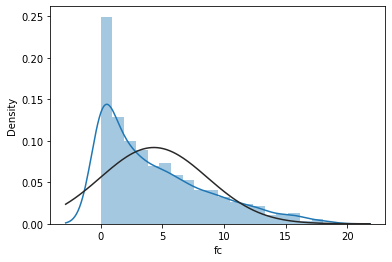

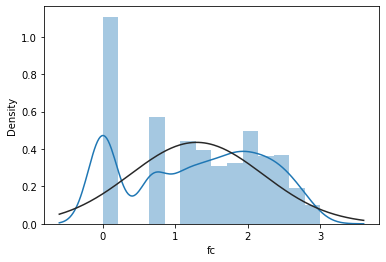

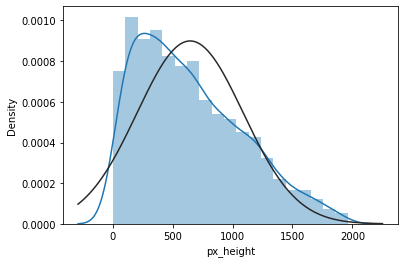

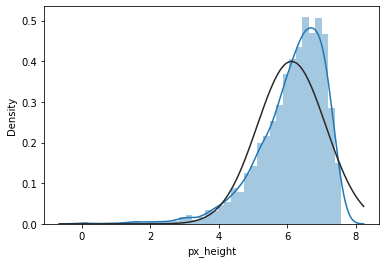

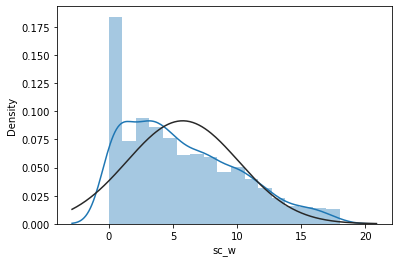

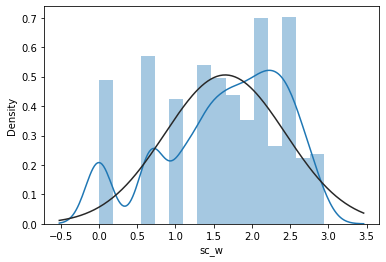

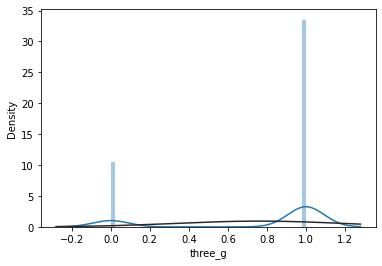

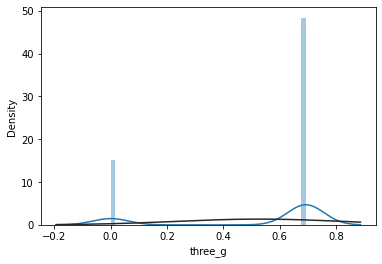

<Figure size 432x288 with 0 Axes>

In [ ]:
from scipy.stats import norm
for i in high_skew:
  sns.distplot(df[i], fit=norm);
  fig = plt.figure()

  sns.distplot((df[i]+1).transform(np.log), fit=norm);
  fig = plt.figure()

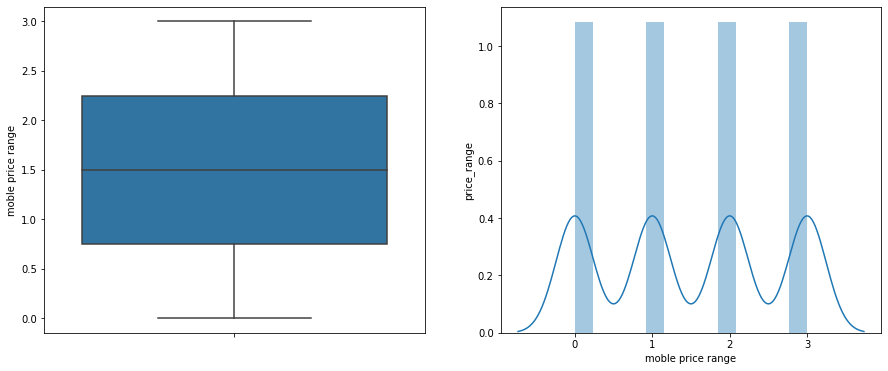

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=df["price_range"])
fig.set_title('')
fig.set_ylabel("moble price range")
    
plt.subplot(1, 2, 2)
fig = sns.distplot(df["price_range"].dropna())
fig.set_ylabel('price_range')
fig.set_xlabel("moble price range")

plt.show()

##<b>FEATURE ENGG:

In [ ]:
df_final = df.copy()

In [ ]:
df_final['screen_size'] = np.sqrt((df['sc_h']^2)+(df['sc_w']^2))
df_final['PPI'] = np.sqrt((df['px_width']**2)+(df['px_height']**2))/df_final['screen_size']

In [ ]:
for i in ['four_g','three_g']:
    df[i] = df[i].astype('str')

In [ ]:
df2 = df['four_g']+df['three_g']

In [ ]:
df1 = pd.get_dummies(df2,prefix='4g_3g')

In [ ]:
df_final = pd.concat([df_final,df1],axis=1)

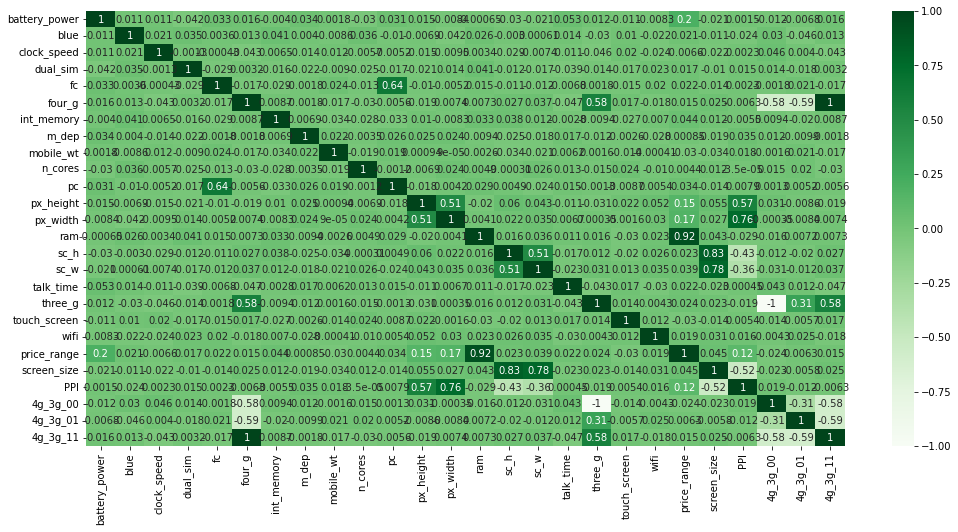

In [ ]:
# #correlation map
plt.figure(figsize=(17,8))
sns.heatmap(df_final.corr(),annot=True,cmap='Greens')

In [ ]:
def detect_outlier(df,features):
    outlier_indices = []

    '''this function helps ud to finding outlier'''
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    return outlier_indices

In [ ]:
df.loc[detect_outlier(df,["fc"])]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,...,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,...,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,...,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,...,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1


In [ ]:
# calculate the first quartile
Q1 = df_final.quantile(0.25)

#calculate the third quartile
Q3 = df_final.quantile(0.75)

# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
print(IQR)

battery_power     763.500000
blue                1.000000
clock_speed         1.500000
dual_sim            1.000000
fc                  6.000000
four_g              1.000000
int_memory         32.000000
m_dep               0.600000
mobile_wt          61.000000
n_cores             4.000000
pc                 10.000000
px_height         664.500000
px_width          758.250000
ram              1857.000000
sc_h                7.000000
sc_w                7.000000
talk_time          10.000000
three_g             0.000000
touch_screen        1.000000
wifi                1.000000
price_range         1.500000
screen_size         1.331730
PPI               221.815751
4g_3g_00            0.000000
4g_3g_01            0.000000
4g_3g_11            1.000000
dtype: float64


In [ ]:
df_outliers = df_final[((df_final < (Q1 - 1.5 * IQR)) | (df_final > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_outliers.shape

(988, 26)



---




---



---

##<B>MACHINE LEARNING MODEL IMPLEMENTATION


---



---



---



##<b>TRAIN TEST SPLIT:

In [ ]:
X = df_final.drop('price_range',axis=1)
y = df_final['price_range']

In [ ]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,screen_size,PPI,4g_3g_00,4g_3g_01,4g_3g_11
0,842,0,2.2,0,1,0,7,0.6,188,2,...,7,19,0,0,1,4.000000,189.066126,1,0,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,3,7,1,1,0,4.472136,488.424457,0,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2,9,1,1,0,3.000000,710.228836,0,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,8,11,1,0,0,5.291503,408.326375,0,1,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,2,15,1,1,0,3.162278,541.129190,0,0,1


In [ ]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 5)
print(f'the shape of X : {X.shape}')
print(f'the shape of y :{y.shape}') 
print(f'the shape of X_train : {X_train.shape}')
print(f'the shape of y_train : {X_test.shape}')

the shape of X : (2000, 25)
the shape of y :(2000,)
the shape of X_train : (1600, 25)
the shape of y_train : (400, 25)


##<b><u>Implementation of Machine Learning Alogorithms:

<b>To predict the mobile phone price, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.

##<b>LOGISTIC REGRESSION:

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

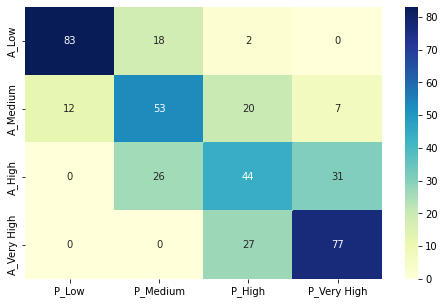

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       103
           1       0.55      0.58      0.56        92
           2       0.47      0.44      0.45       101
           3       0.67      0.74      0.70       104

    accuracy                           0.64       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.64      0.64      0.64       400



In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [ ]:
multiclass_roc_auc_score(y_test, y_pred)

0.7603026523349335

In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','f1-score','Accuracy Score','Train Accuracy']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Logistic_regression_metrics = pd.Series({'Model': "Logistic regression ",
                     'AUC Score' : multiclass_roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Train Accuracy': logreg.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.6325


##<b>Logistic Regression with SGD:

In [ ]:
# instantiate the 'SGDClassifier' to bild model using SGD
logreg_with_SGD = SGDClassifier()

# fit the model on training data
logreg_with_SGD.fit(X_train, y_train)

# use predict() to predict the values
logreg_with_SGD_pred = logreg_with_SGD.predict(X_test)

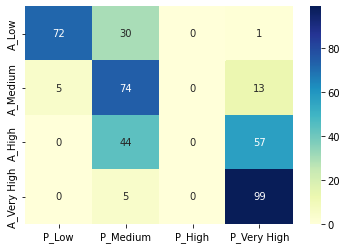

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, logreg_with_SGD_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,logreg_with_SGD_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.94      0.70      0.80       103
           1       0.48      0.80      0.60        92
           2       0.00      0.00      0.00       101
           3       0.58      0.95      0.72       104

    accuracy                           0.61       400
   macro avg       0.50      0.61      0.53       400
weighted avg       0.50      0.61      0.53       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Logistic_regression_SGD_metrics = pd.Series({'Model': "Logistic regression with SGD",
                     'AUC Score' : multiclass_roc_auc_score(y_test, logreg_with_SGD_pred),
                 'Precision Score': metrics.precision_score(y_test, logreg_with_SGD_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, logreg_with_SGD_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, logreg_with_SGD_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, logreg_with_SGD_pred),
                 'Train Accuracy': logreg_with_SGD.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_SGD_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.63250
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.60125


##<b>Decision Tree:

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='entropy')

# train model
decision_tree = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_pred = decision_tree.predict(X_test)

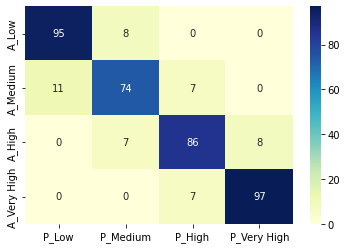

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_pred)

# print the result
print(result)


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       103
           1       0.83      0.80      0.82        92
           2       0.86      0.85      0.86       101
           3       0.92      0.93      0.93       104

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_metrics = pd.Series({'Model': "Decision Tree",
                     'AUC Score' : multiclass_roc_auc_score(y_test, decision_tree_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_pred),
                 'Train Accuracy': decision_tree.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.63250
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.60125
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.00000


##<b>Decision Tree using Grid Search CV:

In [ ]:
max_depth = np.arange(1,5,1)
min_samples_leaf = np.arange(0,50,10)
max_leaf_nodes = np.arange(1,5,1)

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf,
              "max_leaf_nodes": max_leaf_nodes}

In [ ]:
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=10)
decision_tree_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'max_leaf_nodes': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([ 0, 10, 20, 30, 40])})

In [ ]:
decision_tree_Gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 10}

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='gini',
 max_depth=2,
 max_leaf_nodes=4,
 min_samples_leaf=10)

# train model
decision_tree_Grid = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_Grid_pred = decision_tree_Grid.predict(X_test)

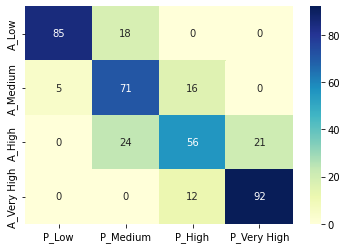

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_Grid_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_Grid_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       103
           1       0.63      0.77      0.69        92
           2       0.67      0.55      0.61       101
           3       0.81      0.88      0.85       104

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.77      0.76      0.76       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_Grid_metrics = pd.Series({'Model': "Decision Tree with Grid Search",
                     'AUC Score' : multiclass_roc_auc_score(y_test, decision_tree_Grid_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_Grid_pred),
                 'Train Accuracy': decision_tree_Grid.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_Grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375


##<b>Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
random_forest = RandomForestClassifier()

# train model
random_forest.fit(X_train, y_train)

# predict the model using 'X_test'
rf_pred = random_forest.predict(X_test)

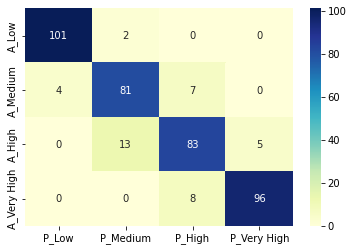

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,rf_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.84      0.88      0.86        92
           2       0.85      0.82      0.83       101
           3       0.95      0.92      0.94       104

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Random Forest",
                     'AUC Score' : multiclass_roc_auc_score(y_test, rf_pred),
                 'Precision Score': metrics.precision_score(y_test, rf_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, rf_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, rf_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, rf_pred),
                 'Train Accuracy': random_forest.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375
4,Random Forest,0.934581,0.902734,0.9025,0.902404,0.9025,1.000000


##<b>KNN:

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [ ]:
param_grid_knn = {'n_neighbors':np.arange(1,15,2), 'p':[1,2,3]}

In [ ]:
# instantiate the KNN classifier
knn_Gridsearch = KNeighborsClassifier()

# use 'GridSearchCV' to obtain the best value of K
knn_Gridsearch_CV = GridSearchCV(knn_Gridsearch, param_grid_knn, cv=5)

# fit the model
knn_Gridsearch_CV.fit(X_train_scale,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13]),
                         'p': [1, 2, 3]})

In [ ]:
knn_Gridsearch_CV.best_params_

{'n_neighbors': 13, 'p': 1}

In [ ]:
# as K = 13, is a best pick for K, build a KNN model with K = 7
knn = KNeighborsClassifier(n_neighbors=13,p=1)

#Fit the model
knn.fit(X_train_scale,y_train)

knn_pred = knn.predict(X_test_scale)

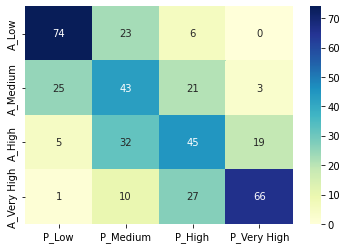

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, knn_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,knn_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       103
           1       0.40      0.47      0.43        92
           2       0.45      0.45      0.45       101
           3       0.75      0.63      0.69       104

    accuracy                           0.57       400
   macro avg       0.58      0.57      0.57       400
weighted avg       0.58      0.57      0.57       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
knn_metrics = pd.Series({'Model': "KNN",
                     'AUC Score' : multiclass_roc_auc_score(y_test, knn_pred),
                 'Precision Score': metrics.precision_score(y_test, knn_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, knn_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, knn_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, knn_pred),
                 'Train Accuracy': knn.score(X_train,y_train)})


# appending our result table
result_tabulation = result_tabulation.append(knn_metrics , ignore_index = True)

# view the result table
result_tabulation.rename(columns={'Accuracy Score':'Test Accuracy'},inplace=True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Test Accuracy,Train Accuracy
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375
4,Random Forest,0.934581,0.902734,0.9025,0.902404,0.9025,1.000000
5,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625


##<B><U>FEATURE SELACTION FOR BATTER MODEL:

Text(0.5, 1.0, 'Visualizing Important Features')

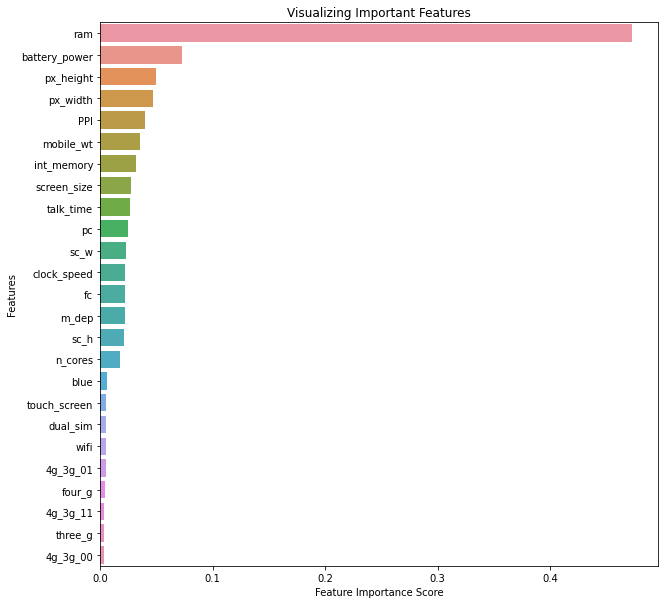

In [ ]:
feature_imp = pd.Series(random_forest.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [ ]:
rf_f = feature_imp[feature_imp>0.027].index.tolist()
rf_f

['ram',
 'battery_power',
 'px_height',
 'px_width',
 'PPI',
 'mobile_wt',
 'int_memory',
 'screen_size']

In [ ]:
sel_chi2 = SelectKBest(chi2, k=8)    # select 4 features
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)
print(sel_chi2.get_support())

[ True False False False  True False  True False  True False False  True
  True  True False False False False False False False  True False False
 False]


In [ ]:
temp = pd.Series(sel_chi2.get_support(),index = X.columns)
selected_features_kbest = temp[temp==True].index
kbest_f = selected_features_kbest.tolist()
print(selected_features_kbest)

Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'PPI'],
      dtype='object')


In [ ]:
d = {'random forest': sorted(rf_f), 'kbest': sorted(kbest_f)}
feat_sel = pd.DataFrame(d)
feat_sel

,random forest,kbest
0,PPI,PPI
1,battery_power,battery_power
2,int_memory,fc
3,mobile_wt,int_memory
4,px_height,mobile_wt
5,px_width,px_height
6,ram,px_width
7,screen_size,ram


In [ ]:
df_feat = df_final[rf_f]
print('THE SHAPE OF DF_FEAT IS :',df_feat.shape)

THE SHAPE OF DF_FEAT IS : (2000, 8)


In [ ]:
X = df_feat
y = df_final['price_range']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

##<B>LOGISTIC REGRESSION WITH FEATURE SELACTION:

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

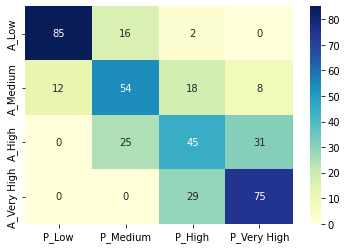

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()


In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       103
           1       0.57      0.59      0.58        92
           2       0.48      0.45      0.46       101
           3       0.66      0.72      0.69       104

    accuracy                           0.65       400
   macro avg       0.65      0.64      0.64       400
weighted avg       0.65      0.65      0.65       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Logistic_regression_metrics = pd.Series({'Model': "Logistic regression with feature selection",
                     'AUC Score' : multiclass_roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Train Accuracy': logreg.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Test Accuracy,Train Accuracy,Accuracy Score
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500,NaN
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250,NaN
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000,NaN
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375,NaN
4,Random Forest,0.934581,0.902734,0.9025,0.902404,0.9025,1.000000,NaN
5,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625,NaN
6,Logistic regression with feature selection,0.763718,0.648311,0.6475,0.647147,NaN,0.633125,0.6475


##<B>DECISION TREE WITH FEATURE SELACTION:

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='entropy')

# train model
decision_tree = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_pred = decision_tree.predict(X_test)


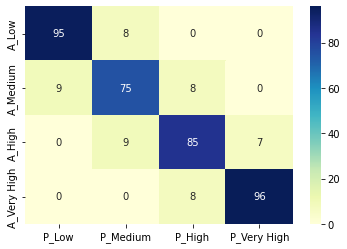

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       103
           1       0.82      0.82      0.82        92
           2       0.84      0.84      0.84       101
           3       0.93      0.92      0.93       104

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_metrics = pd.Series({'Model': "Decision Tree with feature selection",
                     'AUC Score' : multiclass_roc_auc_score(y_test, decision_tree_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_pred),
                 'Train Accuracy': decision_tree.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Test Accuracy,Train Accuracy,Accuracy Score
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500,NaN
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250,NaN
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000,NaN
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375,NaN
4,Random Forest,0.934581,0.902734,0.9025,0.902404,0.9025,1.000000,NaN
5,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625,NaN
6,Logistic regression with feature selection,0.763718,0.648311,0.6475,0.647147,NaN,0.633125,0.6475
7,Decision Tree with feature selection,0.917444,0.877546,0.8775,0.877512,NaN,1.000000,0.8775


##<B>DECISION TREE GREED SEARCH CV WITH FEATURE SELACTION:

In [ ]:
max_depth = np.arange(1,5,1)
min_samples_leaf = np.arange(0,50,10)
max_leaf_nodes = np.arange(10,20,1)

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf,
              "max_leaf_nodes": max_leaf_nodes}

In [ ]:
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=10)
decision_tree_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'max_leaf_nodes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([ 0, 10, 20, 30, 40])})

In [ ]:
decision_tree_Gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 10}

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='gini',
 max_depth=4,
 max_leaf_nodes=15,
 min_samples_leaf=10)

# train model
decision_tree_Grid = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_Grid_pred = decision_tree_Grid.predict(X_test)

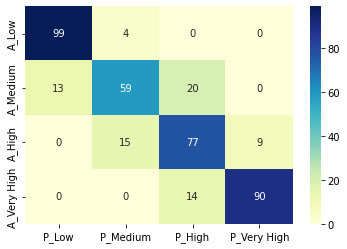

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_Grid_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_Grid_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       103
           1       0.76      0.64      0.69        92
           2       0.69      0.76      0.73       101
           3       0.91      0.87      0.89       104

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_Grid_metrics = pd.Series({'Model': "Decision Tree with Grid Search",
                     'AUC Score' : multiclass_roc_auc_score(y_test, decision_tree_Grid_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_Grid_pred),
                 'Train Accuracy': decision_tree_Grid.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_Grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Test Accuracy,Train Accuracy,Accuracy Score
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500,NaN
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250,NaN
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000,NaN
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375,NaN
4,Random Forest,0.934581,0.902734,0.9025,0.902404,0.9025,1.000000,NaN
5,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625,NaN
6,Logistic regression with feature selection,0.763718,0.648311,0.6475,0.647147,NaN,0.633125,0.6475
7,Decision Tree with feature selection,0.917444,0.877546,0.8775,0.877512,NaN,1.000000,0.8775
8,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,NaN,0.840625,0.8125


##<B>RANDOME FOREST WITH FEATURE SELACTION:

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
random_forest = RandomForestClassifier()

# train model
random_forest.fit(X_train, y_train)

# predict the model using 'X_test'
rf_pred = random_forest.predict(X_test)

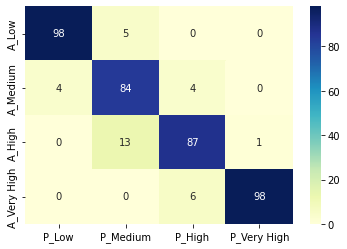

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,rf_pred)

# print the result
print(result)


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       103
           1       0.82      0.91      0.87        92
           2       0.90      0.86      0.88       101
           3       0.99      0.94      0.97       104

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Random Forest with selected features",
                     'AUC Score' : multiclass_roc_auc_score(y_test, rf_pred),
                 'Precision Score': metrics.precision_score(y_test, rf_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, rf_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, rf_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, rf_pred),
                 'Train Accuracy': random_forest.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Test Accuracy,Train Accuracy,Accuracy Score
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500,NaN
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250,NaN
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000,NaN
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375,NaN
4,Random Forest,0.934581,0.902734,0.9025,0.902404,0.9025,1.000000,NaN
5,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625,NaN
6,Logistic regression with feature selection,0.763718,0.648311,0.6475,0.647147,NaN,0.633125,0.6475
7,Decision Tree with feature selection,0.917444,0.877546,0.8775,0.877512,NaN,1.000000,0.8775
8,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,NaN,0.840625,0.8125
9,Random Forest with selected features,0.944933,0.920657,0.9175,0.918299,NaN,1.000000,0.9175


###<B>RANDOME FOREST

In [ ]:
max_depth = np.arange(1,5,1)
min_samples_leaf = np.arange(0,50,10)
max_leaf_nodes = np.arange(10,18,1)
n_estima = np.arange(100,200,25)

param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf,
              "max_leaf_nodes": max_leaf_nodes,
              "n_estimators":n_estima}

In [ ]:
random_forest_Gridsearch = RandomForestClassifier()
random_forest_Gridsearch = GridSearchCV(random_forest_Gridsearch, param_grid, cv=5)
random_forest_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'max_leaf_nodes': array([10, 11, 12, 13, 14, 15, 16, 17]),
                         'min_samples_leaf': array([ 0, 10, 20, 30, 40]),
                         'n_estimators': array([100, 125, 150, 175])})

In [ ]:
random_forest_Gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 10,
 'n_estimators': 175}

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
random_forest = RandomForestClassifier(criterion= 'gini',
                                       max_depth=4,max_leaf_nodes=15,min_samples_leaf=20,n_estimators=125)

# train model
random_forest.fit(X_train, y_train)

# predict the model using 'X_test'
rf_pred = random_forest.predict(X_test)

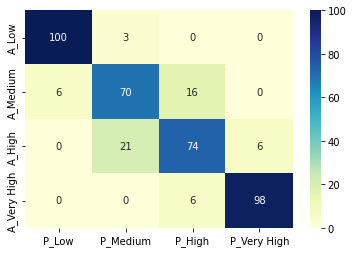

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,rf_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       103
           1       0.74      0.76      0.75        92
           2       0.77      0.73      0.75       101
           3       0.94      0.94      0.94       104

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Random Forest with selected features and Grid Search",
                     'AUC Score' : multiclass_roc_auc_score(y_test, rf_pred),
                 'Precision Score': metrics.precision_score(y_test, rf_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, rf_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, rf_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, rf_pred),
                 'Train Accuracy': random_forest.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Test Accuracy,Train Accuracy,Accuracy Score
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500,NaN
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250,NaN
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000,NaN
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375,NaN
4,Random Forest,0.934581,0.902734,0.9025,0.902404,0.9025,1.000000,NaN
5,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625,NaN
6,Logistic regression with feature selection,0.763718,0.648311,0.6475,0.647147,NaN,0.633125,0.6475
7,Decision Tree with feature selection,0.917444,0.877546,0.8775,0.877512,NaN,1.000000,0.8775
8,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,NaN,0.840625,0.8125
9,Random Forest with selected features,0.944933,0.920657,0.9175,0.918299,NaN,1.000000,0.9175


##<B>ADA-BOOST WITH FEATURE SELACTION:

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
adaboost = AdaBoostClassifier()

# train model
adaboost.fit(X_train, y_train)

# predict the model using 'X_test'
ada_pred = adaboost.predict(X_test)

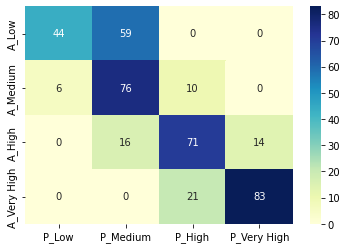

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, ada_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()


In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,ada_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.88      0.43      0.58       103
           1       0.50      0.83      0.63        92
           2       0.70      0.70      0.70       101
           3       0.86      0.80      0.83       104

    accuracy                           0.69       400
   macro avg       0.73      0.69      0.68       400
weighted avg       0.74      0.69      0.68       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Ada Boost with selected features",
                     'AUC Score' : multiclass_roc_auc_score(y_test, ada_pred),
                 'Precision Score': metrics.precision_score(y_test, ada_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, ada_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, ada_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, ada_pred),
                 'Train Accuracy': adaboost.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Test Accuracy,Train Accuracy,Accuracy Score
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500,NaN
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250,NaN
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000,NaN
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375,NaN
4,Random Forest,0.934581,0.902734,0.9025,0.902404,0.9025,1.000000,NaN
5,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625,NaN
6,Logistic regression with feature selection,0.763718,0.648311,0.6475,0.647147,NaN,0.633125,0.6475
7,Decision Tree with feature selection,0.917444,0.877546,0.8775,0.877512,NaN,1.000000,0.8775
8,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,NaN,0.840625,0.8125
9,Random Forest with selected features,0.944933,0.920657,0.9175,0.918299,NaN,1.000000,0.9175


##<B>XG BOOST WITH FEATURE SELACTION:

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
xgboost = XGBClassifier()

# train model
xgboost.fit(X_train, y_train)

# predict the model using 'X_test'
xg_pred = xgboost.predict(X_test)

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
xgboost = XGBClassifier()

# train model
xgboost.fit(X_train, y_train)

# predict the model using 'X_test'
xg_pred = xgboost.predict(X_test)

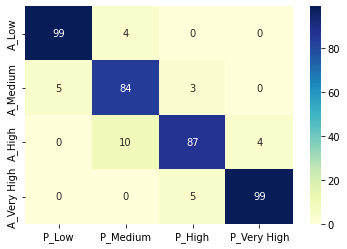

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, xg_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,xg_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       103
           1       0.86      0.91      0.88        92
           2       0.92      0.86      0.89       101
           3       0.96      0.95      0.96       104

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "XG Boost with selected features",
                     'AUC Score' : multiclass_roc_auc_score(y_test, xg_pred),
                 'Precision Score': metrics.precision_score(y_test, xg_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, xg_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, xg_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, xg_pred),
                 'Train Accuracy': xgboost.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Test Accuracy,Train Accuracy,Accuracy Score
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500,NaN
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250,NaN
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000,NaN
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375,NaN
4,Random Forest,0.934581,0.902734,0.9025,0.902404,0.9025,1.000000,NaN
5,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625,NaN
6,Logistic regression with feature selection,0.763718,0.648311,0.6475,0.647147,NaN,0.633125,0.6475
7,Decision Tree with feature selection,0.917444,0.877546,0.8775,0.877512,NaN,1.000000,0.8775
8,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,NaN,0.840625,0.8125
9,Random Forest with selected features,0.944933,0.920657,0.9175,0.918299,NaN,1.000000,0.9175


In [ ]:
max_depth = [3,5,7,9,10]
n_estima = np.arange(1,100,20)
learn = [0.05,0.1,0.15,0.2,0.25,0.3]
colsample = [0.3,0.4,0.5,0.7]

param_grid =  {"max_depth": max_depth,
              "n_estimators":n_estima,
              'learning_rate':learn,
              'colsample_bytree':colsample}

In [ ]:
xgboost_Gridsearch = XGBClassifier()
xgboost_Gridsearch = GridSearchCV(xgboost_Gridsearch, param_grid, cv=5)
xgboost_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 5, 7, 9, 10],
                         'n_estimators': array([ 1, 21, 41, 61, 81])})

In [ ]:
xgboost_Gridsearch.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.25,
 'max_depth': 3,
 'n_estimators': 81}

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
xgboost = XGBClassifier(colsample_bytree= 0.7,
 learning_rate=0.25,
 max_depth=3,
 n_estimators=100)

# train model
xgboost.fit(X_train, y_train)

# predict the model using 'X_test'
xg_pred = xgboost.predict(X_test)

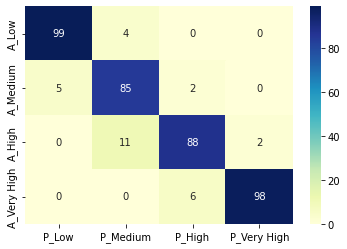

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, xg_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,xg_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       103
           1       0.85      0.92      0.89        92
           2       0.92      0.87      0.89       101
           3       0.98      0.94      0.96       104

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "XG Boost with selected features and Grid Search",
                     'AUC Score' : multiclass_roc_auc_score(y_test, xg_pred),
                 'Precision Score': metrics.precision_score(y_test, xg_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, xg_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, xg_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, xg_pred),
                 'Train Accuracy': xgboost.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Test Accuracy,Train Accuracy,Accuracy Score
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500,NaN
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250,NaN
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000,NaN
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375,NaN
4,Random Forest,0.934581,0.902734,0.9025,0.902404,0.9025,1.000000,NaN
5,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625,NaN
6,Logistic regression with feature selection,0.763718,0.648311,0.6475,0.647147,NaN,0.633125,0.6475
7,Decision Tree with feature selection,0.917444,0.877546,0.8775,0.877512,NaN,1.000000,0.8775
8,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,NaN,0.840625,0.8125
9,Random Forest with selected features,0.944933,0.920657,0.9175,0.918299,NaN,1.000000,0.9175


##<B>STACKING:

In [ ]:
!pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=5ed407db8eec516e299d7ab9b5080e5cb2d54571712b7a2fbde165a5908fb263
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [ ]:
from vecstack import stacking

In [ ]:
model = [DecisionTreeClassifier(criterion='gini',
         max_depth=4,
         max_leaf_nodes=15,
         min_samples_leaf=10),
        RandomForestClassifier(criterion= 'gini',
         max_depth=4,
         max_leaf_nodes=15,
         min_samples_leaf=20,
         n_estimators=125),
         XGBClassifier(colsample_bytree= 0.7,
 learning_rate=0.25,
 max_depth=3,
 n_estimators=100)]

In [ ]:
S_train, S_test = stacking(model,
                           X_train, y_train, X_test,
                           
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,
                           
                           random_state=10)

In [ ]:
model=XGBClassifier(random_state=10, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)

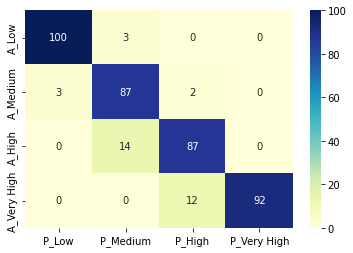

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       103
           1       0.84      0.95      0.89        92
           2       0.86      0.86      0.86       101
           3       1.00      0.88      0.94       104

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.91       400
weighted avg       0.92      0.92      0.92       400



In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Stacking with selected features",
                     'AUC Score' : multiclass_roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Train Accuracy': model.score(S_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Test Accuracy,Train Accuracy,Accuracy Score
0,Logistic regression,0.760303,0.644193,0.6425,0.642246,0.6425,0.632500,NaN
1,Logistic regression with SGD,0.742763,0.503433,0.6125,0.532822,0.6125,0.601250,NaN
2,Decision Tree,0.918908,0.879355,0.8800,0.879567,0.8800,1.000000,NaN
3,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375,NaN
4,Random Forest,0.934581,0.902734,0.9025,0.902404,0.9025,1.000000,NaN
5,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625,NaN
6,Logistic regression with feature selection,0.763718,0.648311,0.6475,0.647147,NaN,0.633125,0.6475
7,Decision Tree with feature selection,0.917444,0.877546,0.8775,0.877512,NaN,1.000000,0.8775
8,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,NaN,0.840625,0.8125
9,Random Forest with selected features,0.944933,0.920657,0.9175,0.918299,NaN,1.000000,0.9175


In [ ]:
result_tabulation1 = result_tabulation.copy()

In [ ]:
result_tabulation1.drop(['Test Accuracy'][0],axis=1,inplace=True)

In [ ]:
result_tabulation1.drop(['Precision Score','Recall Score'],axis=1,inplace=True)

In [ ]:
result_tabulation1[6:]

,Model,AUC Score,f1-score,Train Accuracy,Accuracy Score
6,Logistic regression with feature selection,0.763718,0.647147,0.633125,0.6475
7,Decision Tree with feature selection,0.917444,0.877512,1.000000,0.8775
8,Decision Tree with Grid Search,0.872582,0.810748,0.840625,0.8125
9,Random Forest with selected features,0.944933,0.918299,1.000000,0.9175
10,Random Forest with selected features and Grid ...,0.901844,0.854225,0.878125,0.8550
11,Ada Boost with selected features,0.792454,0.683325,0.730625,0.6850
12,XG Boost with selected features,0.948120,0.922527,0.983125,0.9225
13,XG Boost with selected features and Grid Search,0.949953,0.925338,0.999375,0.9250
14,Stacking with selected features,0.943801,0.915765,0.891875,0.9150
15,Stacking with selected features,0.943801,0.915765,0.891875,0.9150


In [ ]:
result_tabulation1.iloc[[10,13,14]]

,Model,AUC Score,f1-score,Train Accuracy,Accuracy Score
10,Random Forest with selected features and Grid ...,0.901844,0.854225,0.878125,0.855
13,XG Boost with selected features and Grid Search,0.949953,0.925338,0.999375,0.925
14,Stacking with selected features,0.943801,0.915765,0.891875,0.915


<b>The performance of the models is measured using accuracy score (since the data is balanced). From the above table, it can be seen that Random Forest and XGBoost have a good accuracy score yet they are overfit models. However, stacking(Random Forest,XGBoost, Decision Tree) not only is not overfit but also gives a good accuracy score. We can conclude that the stacking model is a good classifier of mobile price range.